In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import vizro.plotly.express as px
from vizro import Vizro
import vizro.models as vm

In [2]:
# st.write("""
# # My first app
# Hello *world!*
# """)
 
# df = pd.read_csv("smb_restaurants - dataset.csv")
# st.line_chart(df)

In [3]:
# Read in data
smb_raw = pd.read_excel('smb_restaurants.xlsx', sheet_name='dataset')
smb_raw

,business_name,insta_link,insta_followers,insta_ave_views_first5_biz_202309,insta_ave_likes_first5_biz_202309,insta_ave_comments_first5_biz_202309,insta_ave_views_first5_biz_202308,insta_ave_likes_first5_biz_202308,insta_ave_comments_first5_biz_202308,insta_ave_views_first5_biz_202307,...,tiktok_ave_comments_first5_nonbiz_202307,tiktok_ave_views_first5_nonbiz_202306,tiktok_ave_likes_first5_nonbiz_202306,tiktok_ave_comments_first5_nonbiz_202306,tiktok_ave_views_first5_nonbiz_202305,tiktok_ave_likes_first5_nonbiz_202305,tiktok_ave_comments_first5_nonbiz_202305,tiktok_ave_views_first5_nonbiz_202304,tiktok_ave_likes_first5_nonbiz_202304,tiktok_ave_comments_first5_nonbiz_202304
0,Cafe Luna,https://www.instagram.com/cafelunacentralsq/,3160,na,na,na,na,na,na,na,...,4,1821.666667,35.5,3,3020,134,3,0,0,0
1,Moona,https://www.instagram.com/moonarestaurant/,6882,na,50.5,1,na,70,5,na,...,0,18484,1112,10,968,40,5,63700,2569,52
2,4 Corners Pizza,https://www.instagram.com/4cornerspizza/,27000,13548,424,47,23624.5,1096.5,23,29607.66667,...,24.5,16813.5,405.2,3,25633.5,4121,22,1402,43,1.5
3,Hunters,https://www.instagram.com/huntersboston/,21000,12321,256,4.6,7276,260.2,2.6,na,...,0,2212,129.5,1,566,31,1,378.8,12,0.4
4,Ruka Resto Bar,https://www.instagram.com/rukarestobar/,12000,4897,157.4,1.4,2701,118.4,1.8,3869,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crudo Boston,https://www.instagram.com/crudoboston/,1854,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,536,20,0
96,Meimei dumplings,https://www.instagram.com/meimeidumplings/,25000,na,439.2,13.2,na,549.4,4,na,...,na,na,na,na,na,na,na,na,na,na
97,Paramount Southie,https://www.instagram.com/paramountsouthie/,3032,na,na,0,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
98,Teado Central,https://www.instagram.com/teadocentral/,104,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na


In [4]:
# Preprocessing
smb = smb_raw.replace('na', np.nan)
# Assuming your DataFrame is df
smb.fillna(0, inplace=True)
print(smb)
print(smb.dtypes)

        business_name                                    insta_link  \
0           Cafe Luna  https://www.instagram.com/cafelunacentralsq/   
1               Moona    https://www.instagram.com/moonarestaurant/   
2     4 Corners Pizza      https://www.instagram.com/4cornerspizza/   
3             Hunters      https://www.instagram.com/huntersboston/   
4      Ruka Resto Bar       https://www.instagram.com/rukarestobar/   
..                ...                                           ...   
95       Crudo Boston        https://www.instagram.com/crudoboston/   
96   Meimei dumplings    https://www.instagram.com/meimeidumplings/   
97  Paramount Southie   https://www.instagram.com/paramountsouthie/   
98      Teado Central       https://www.instagram.com/teadocentral/   
99       Trade Boston        https://www.instagram.com/tradeboston/   

    insta_followers  insta_ave_views_first5_biz_202309  \
0            3160.0                                0.0   
1            6882.0            

In [5]:
# Update data types
data_types = {'business_name': 'string', 'insta_link': 'string', 'insta_name': 'string'}
smb = smb.astype(data_types)
print(smb.dtypes)

business_name                               string[python]
insta_link                                  string[python]
insta_followers                                    float64
insta_ave_views_first5_biz_202309                  float64
insta_ave_likes_first5_biz_202309                  float64
                                                 ...      
tiktok_ave_likes_first5_nonbiz_202305              float64
tiktok_ave_comments_first5_nonbiz_202305           float64
tiktok_ave_views_first5_nonbiz_202304              float64
tiktok_ave_likes_first5_nonbiz_202304              float64
tiktok_ave_comments_first5_nonbiz_202304           float64
Length: 83, dtype: object


In [8]:
print(smb.columns)

Index(['business_name', 'insta_link', 'insta_followers',
       'insta_ave_views_first5_biz_202309',
       'insta_ave_likes_first5_biz_202309',
       'insta_ave_comments_first5_biz_202309',
       'insta_ave_views_first5_biz_202308',
       'insta_ave_likes_first5_biz_202308',
       'insta_ave_comments_first5_biz_202308',
       'insta_ave_views_first5_biz_202307',
       'insta_ave_likes_first5_biz_202307',
       'insta_ave_comments_first5_biz_202307',
       'insta_ave_views_first5_biz_202306',
       'insta_ave_likes_first5_biz_202306',
       'insta_ave_comments_first5_biz_202306',
       'insta_ave_views_first5_biz_202305',
       'insta_ave_likes_first5_biz_202305',
       'insta_ave_comments_first5_biz_202305',
       'insta_ave_views_first5_biz_202304',
       'insta_ave_likes_first5_biz_202304',
       'insta_ave_comments_first5_biz_202304', 'fb_link', 'fb_followers',
       'fb_ave_views_first5_biz_202309', 'fb_ave_likes_first5_biz_202309',
       'fb_ave_comments_first5_

# Get stacked cols of likes, comments and views for each platform

In [85]:
# Drop rows of a df that are all 0s
def drop_zero_rows(df):
    return df.loc[~(df==0).all(axis=1)]

# Get stacked columns of monthly likes, comments, and views
def get_stacked_cols(smb, platform):
    # Create dfs containing only columns with likes, comments, or views
    # Stack the columns together
    # Drop rows that are all 0s
    likes_columns = drop_zero_rows(smb.filter(like=f'{platform}_ave_likes_first5_biz').filter(regex='^(?!.*quartile).*$')).stack().reset_index(drop=True)
    comments_columns = drop_zero_rows(smb.filter(like=f'{platform}_ave_comments_first5_biz').filter(regex='^(?!.*quartile).*$')).stack().reset_index(drop=True)
    views_columns = drop_zero_rows(smb.filter(like=f'{platform}_ave_views_first5_biz').filter(regex='^(?!.*quartile).*$')).stack().reset_index(drop=True)

    return likes_columns, comments_columns, views_columns

In [86]:
likes_columns_insta, comments_columns_insta, views_columns_insta = get_stacked_cols(smb, 'insta')
likes_columns_fb, comments_columns_fb, views_columns_fb = get_stacked_cols(smb, 'fb')
likes_columns_tiktok, comments_columns_tiktok, views_columns_tiktok = get_stacked_cols(smb, 'tiktok')
likes_columns_insta

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
511    39.0
512    50.6
513    47.5
514    33.6
515    40.0
Length: 516, dtype: float64

In [87]:
def plot_hist(fb, insta, tiktok, log, metric):
    plt.figure(figsize=(6,4))
    if log:
        fb = np.log(fb+1)
        insta = np.log(insta+1)
        tiktok = np.log(tiktok+1)
    plt.hist(fb, label='fb', alpha=0.5, bins=20)
    plt.hist(insta, label='insta', alpha=0.5, bins=20)
    plt.hist(tiktok, label='tiktok', alpha=0.5, bins=20)
    plt.title(metric)
    plt.legend()
    plt.show()

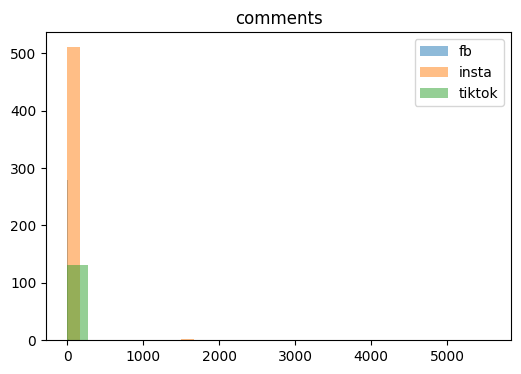

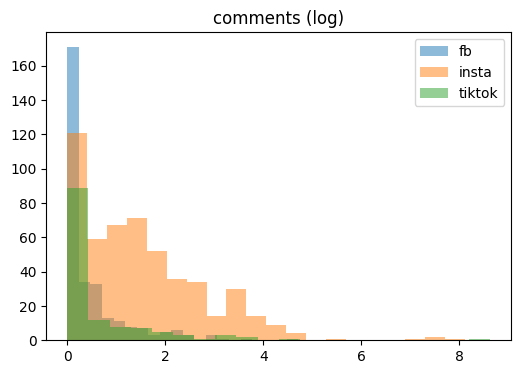

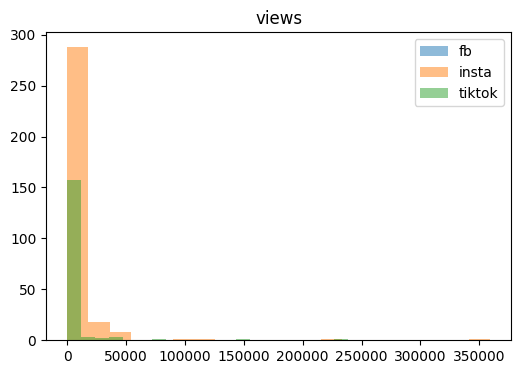

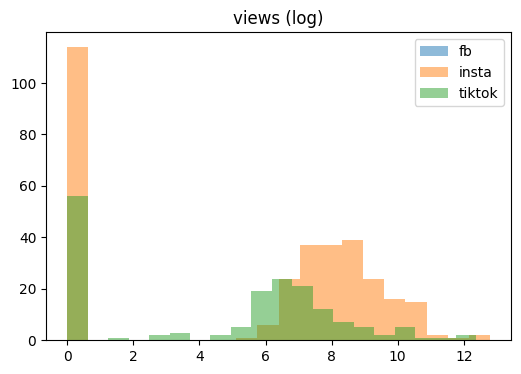

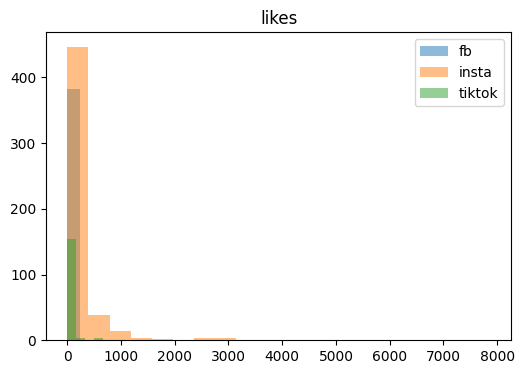

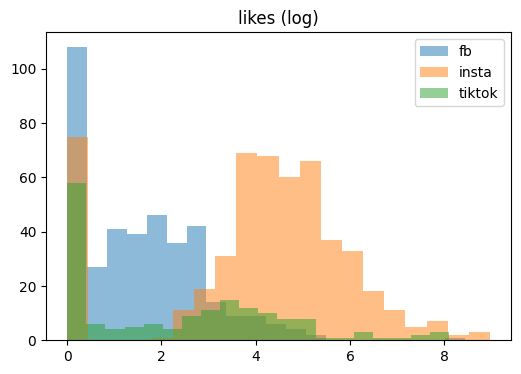

In [88]:
plot_hist(comments_columns_fb, comments_columns_insta, comments_columns_tiktok, log=False, metric='comments')
plot_hist(comments_columns_fb, comments_columns_insta, comments_columns_tiktok, log=True, metric='comments (log)')
plot_hist(views_columns_fb, views_columns_insta, views_columns_tiktok, log=False, metric='views')
plot_hist(views_columns_fb, views_columns_insta, views_columns_tiktok, log=True, metric='views (log)')
plot_hist(likes_columns_fb, likes_columns_insta, likes_columns_tiktok, log=False, metric='likes')
plot_hist(likes_columns_fb, likes_columns_insta, likes_columns_tiktok, log=True, metric='likes (log)')

# Get overall engagement for each platform

In [113]:
# Get total number of likes and views for insta and tiktok
tiktok_likes = drop_zero_rows(smb.filter(like=f'tiktok_ave_likes_first5_biz')).stack().reset_index(drop=True).sum()
insta_likes = drop_zero_rows(smb.filter(like=f'insta_ave_likes_first5_biz')).stack().reset_index(drop=True).sum()
fb_likes = drop_zero_rows(smb.filter(like=f'fb_ave_likes_first5_biz')).stack().reset_index(drop=True).sum()
tiktok_views = drop_zero_rows(smb.filter(like=f'tiktok_ave_views_first5_biz')).stack().reset_index(drop=True).sum()
insta_views = drop_zero_rows(smb.filter(like=f'insta_ave_views_first5_biz')).stack().reset_index(drop=True).sum()

tiktok_view_to_like_ratio = tiktok_views/tiktok_likes
insta_view_to_like_ratio = insta_views/insta_likes
fb_view_to_like_ratio = 0.5*(tiktok_views/tiktok_likes+insta_views/insta_likes)

print("Tiktok view to like ratio:", tiktok_view_to_like_ratio)
print("Insta view to like ratio:", insta_view_to_like_ratio)
print("Estimated FB view to like ratio:", fb_view_to_like_ratio)

Tiktok view to like ratio: 40.15629141323766
Insta view to like ratio: 18.420619974741825
Estimated FB view to like ratio: 29.288455693989743


In [117]:
def get_overall_engagement(smb, platform, fb_view_to_like_ratio):
    months = ['202304', '202305', '202306', '202307', '202308', '202309']
    # metrics = ['likes', 'comments', 'views']
    
    overall_engagement_stacked = pd.DataFrame()
    for month in months:
        # Get the views, likes and comments for a specific (platform, month)
        views = f'{platform}_ave_views_first5_biz_{month}'
        likes = f'{platform}_ave_likes_first5_biz_{month}'
        comments = f'{platform}_ave_comments_first5_biz_{month}'
        df_month_platform = smb[[views, likes, comments]]

        # Calculate the overall engagement for a platform in a specific month
        # log(views + 5*likes + 10*comments + 1) for insta and tiktok which have views, likes and comments
        if platform != 'fb':
            overall_engagement = np.log(df_month_platform[views] + 5*df_month_platform[likes] + 10*df_month_platform[comments] + 1)
        # log(fb_view_to_like_ratio*likes + 5*likes + 10*comments + 1) for fb which has likes and comments but no views
        else:
            overall_engagement = np.log(fb_view_to_like_ratio * df_month_platform[likes] + 5*df_month_platform[likes] + 10*df_month_platform[comments] + 1)

        # For a platform, concat the overall engagement across different months
        overall_engagement_stacked = pd.concat([overall_engagement_stacked, overall_engagement], axis=1)

    # Drop rows that are all 0s
    overall_engagement_stacked = drop_zero_rows(overall_engagement_stacked)
    # Stack the columns together
    overall_engagement_stacked = overall_engagement_stacked.stack().reset_index(drop=True)

    return overall_engagement_stacked

In [118]:
overall_engagement_fb = get_overall_engagement(smb, 'fb', fb_view_to_like_ratio)
overall_engagement_insta = get_overall_engagement(smb, 'insta', fb_view_to_like_ratio)
overall_engagement_tiktok = get_overall_engagement(smb, 'tiktok', fb_view_to_like_ratio)
overall_engagement_insta


0      5.771441
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
517    5.187386
518    5.531411
519    5.590987
520    5.318120
521    5.811141
Length: 522, dtype: float64

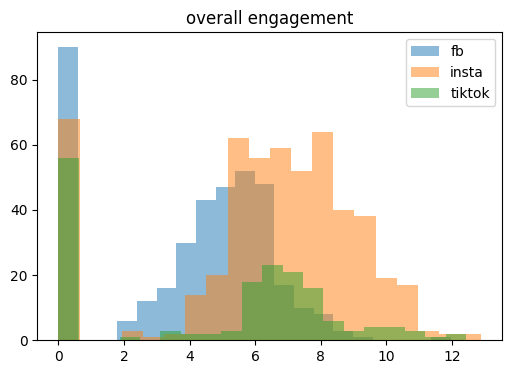

In [119]:
plot_hist(overall_engagement_fb, overall_engagement_insta, overall_engagement_tiktok, log=False, metric='overall engagement')

In [141]:
# Split overall engagement into 4 quartiles
overall_engagement_fb_quartiles = pd.qcut(overall_engagement_fb, 4, labels=False)
overall_engagement_fb_quartiles

0      3
1      0
2      3
3      0
4      0
      ..
379    1
380    2
381    2
382    2
383    1
Length: 384, dtype: int64

In [136]:
predicted_probs_fb = [0.7, 0.2, 0.08, 0.02]
predicted_probs_insta = [0.5, 0.35, 0.1, 0.05]
predicted_probs_tiktok = [0.6, 0.3, 0.08, 0.02]

# Draw a random number from the predicted probabilities
def draw_random_num(predicted_probs):
    return np.random.choice([0, 1, 2, 3], p=predicted_probs)

(array([509.,   0.,   0., 341.,   0.,   0., 106.,   0.,   0.,  44.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

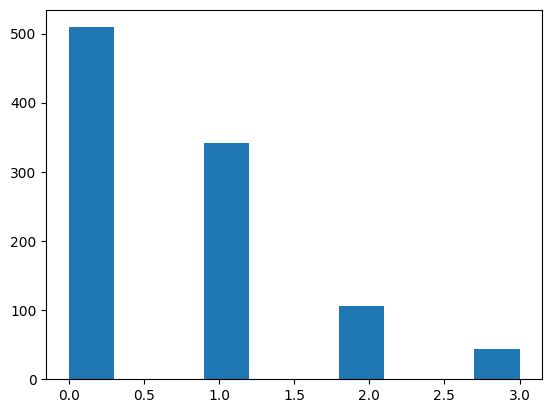

In [140]:
rng = []
for i in range(1000):
    sample_quantile = draw_random_num(predicted_probs_fb)
    rng.append(draw_random_num(predicted_probs_insta))
plt.hist(rng)

# Other

In [6]:
# Update numeric features
numeric_features = [col for col in smb.columns if col !="business_name" and col !="insta_link" and col !="insta_name"
                   and col !="fb_link" and col !='insta_name.1' and col !="Unnamed: 41" and col !="tiktok_link"]
numeric_features
for feature in numeric_features:
    smb[feature] = pd.to_numeric(smb[feature], errors='coerce')
print(smb.dtypes)

business_name                               string[python]
insta_link                                  string[python]
insta_followers                                    float64
insta_ave_views_first5_biz_202309                  float64
insta_ave_likes_first5_biz_202309                  float64
                                                 ...      
tiktok_ave_likes_first5_nonbiz_202305              float64
tiktok_ave_comments_first5_nonbiz_202305           float64
tiktok_ave_views_first5_nonbiz_202304              float64
tiktok_ave_likes_first5_nonbiz_202304              float64
tiktok_ave_comments_first5_nonbiz_202304           float64
Length: 83, dtype: object


In [7]:
# Get features for each platform
insta_features = [col for col in numeric_features if col.startswith("insta_")]
fb_features = [col for col in numeric_features if col.startswith("fb_")]
tt_features = [col for col in numeric_features if col.startswith("tiktok_")]

insta_features
tt_features
fb_features
fb_features_noview = [col for col in fb_features if "_views_" not in col]
fb_features_noview;

(array([56.,  1.,  1.,  1.,  6.,  8.,  5.,  6.,  4.,  3.,  1.,  0.,  0.,
         1.,  1.,  0.,  3.,  0.,  1.,  2.]),
 array([ 0.        ,  0.55134044,  1.10268087,  1.65402131,  2.20536174,
         2.75670218,  3.30804261,  3.85938305,  4.41072349,  4.96206392,
         5.51340436,  6.06474479,  6.61608523,  7.16742566,  7.7187661 ,
         8.27010654,  8.82144697,  9.37278741,  9.92412784, 10.47546828,
        11.02680871]),
 <BarContainer object of 20 artists>)

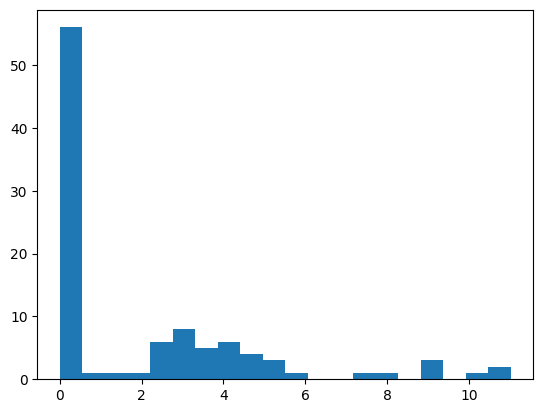

In [8]:
plt.hist(np.log(smb['tiktok_followers']+1), bins=20)

In [9]:
def assign_quartile(column):
    # Replace 0 with 0 and assign quartiles for values > 0
    if column[column > 0].shape[0] > 0:
        col_nonzero_labels = pd.qcut(column[column > 0], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        col_quartile = pd.merge(column, col_nonzero_labels, left_index=True, right_index=True, how='left').iloc[:,1]
    else: # no non-0 entries
        col_quartile = column.replace(0, np.nan)
    return col_quartile

In [10]:
assign_quartile(smb['insta_ave_views_first5_biz_202309'])

0     NaN
1     NaN
2      Q4
3      Q4
4      Q3
     ... 
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
Name: insta_ave_views_first5_biz_202309_y, Length: 100, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [11]:
for feature in numeric_features:
    smb[f'{feature}_quartile'] = assign_quartile(smb[feature])
smb

,business_name,insta_link,insta_followers,insta_ave_views_first5_biz_202309,insta_ave_likes_first5_biz_202309,insta_ave_comments_first5_biz_202309,insta_ave_views_first5_biz_202308,insta_ave_likes_first5_biz_202308,insta_ave_comments_first5_biz_202308,insta_ave_views_first5_biz_202307,...,tiktok_ave_comments_first5_nonbiz_202307_quartile,tiktok_ave_views_first5_nonbiz_202306_quartile,tiktok_ave_likes_first5_nonbiz_202306_quartile,tiktok_ave_comments_first5_nonbiz_202306_quartile,tiktok_ave_views_first5_nonbiz_202305_quartile,tiktok_ave_likes_first5_nonbiz_202305_quartile,tiktok_ave_comments_first5_nonbiz_202305_quartile,tiktok_ave_views_first5_nonbiz_202304_quartile,tiktok_ave_likes_first5_nonbiz_202304_quartile,tiktok_ave_comments_first5_nonbiz_202304_quartile
0,Cafe Luna,https://www.instagram.com/cafelunacentralsq/,3160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,Q3,Q2,Q2,Q2,Q2,Q3,Q2,NaN,NaN,NaN
1,Moona,https://www.instagram.com/moonarestaurant/,6882.0,0.0,50.5,1.0,0.0,70.0,5.0,0.00000,...,NaN,Q4,Q4,Q4,Q1,Q1,Q3,Q4,Q4,Q4
2,4 Corners Pizza,https://www.instagram.com/4cornerspizza/,27000.0,13548.0,424.0,47.0,23624.5,1096.5,23.0,29607.66667,...,Q4,Q4,Q4,Q2,Q4,Q4,Q4,Q2,Q2,Q1
3,Hunters,https://www.instagram.com/huntersboston/,21000.0,12321.0,256.0,4.6,7276.0,260.2,2.6,0.00000,...,NaN,Q3,Q3,Q1,Q1,Q1,Q1,Q1,Q1,Q1
4,Ruka Resto Bar,https://www.instagram.com/rukarestobar/,12000.0,4897.0,157.4,1.4,2701.0,118.4,1.8,3869.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crudo Boston,https://www.instagram.com/crudoboston/,1854.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q1,Q1,NaN
96,Meimei dumplings,https://www.instagram.com/meimeidumplings/,25000.0,0.0,439.2,13.2,0.0,549.4,4.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Paramount Southie,https://www.instagram.com/paramountsouthie/,3032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Teado Central,https://www.instagram.com/teadocentral/,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Define the platforms
platforms = ['insta', 'fb', 'tiktok']  # Add more platforms as needed

# Iterate through each platform
for platform in platforms:
    # Create dfs containing only columns with likes, comments, or views
    likes_columns = smb.filter(like=f'{platform}_ave_likes_').filter(regex='^(?!.*quartile).*$')
    comments_columns = smb.filter(like=f'{platform}_ave_comments_').filter(regex='^(?!.*quartile).*$')
    views_columns = smb.filter(like=f'{platform}_ave_views_').filter(regex='^(?!.*quartile).*$')

    # Create total likes, comments, and views columns
    smb[f'total_{platform}_views'] = views_columns.sum(axis=1)
    smb[f'total_{platform}_likes'] = likes_columns.sum(axis=1)
    smb[f'total_{platform}_comments'] = comments_columns.select_dtypes(include='number').sum(axis=1)

total_engagement = smb.filter(like='total_')
total_engagement

,total_insta_views,total_insta_likes,total_insta_comments,total_fb_views,total_fb_likes,total_fb_comments,total_tiktok_views,total_tiktok_likes,total_tiktok_comments
0,0.00000,51.333333,6.333333,0.0,26.00,7.0,110293.333333,5764.166667,48.500000
1,0.00000,316.966667,14.600000,0.0,4.05,0.0,84574.000000,3728.000000,67.000000
2,135063.83334,5107.166666,252.500000,0.0,17.50,3.0,90533.666667,6748.200000,63.333333
3,46977.00000,1422.600000,43.400000,0.0,1.00,0.0,4145.800000,178.500000,2.400000
4,23002.00000,725.800000,12.600000,0.0,12.64,0.0,5325.500000,223.000000,2.000000
...,...,...,...,...,...,...,...,...,...
95,0.00000,0.000000,0.000000,0.0,0.00,0.0,1740.500000,50.000000,0.500000
96,0.00000,1848.600000,37.800000,0.0,93.50,10.2,5730.852381,342.200000,4.700000
97,0.00000,0.000000,2.200000,0.0,0.00,0.0,0.000000,0.000000,0.000000
98,0.00000,41.000000,2.000000,0.0,6.10,0.6,86.250000,2.750000,0.000000


In [13]:
insta_like_quantile = smb['total_insta_likes'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_insta_likes'], bins=insta_like_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
insta_comment_quantile= smb['total_insta_comments'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_insta_comments'], bins=insta_comment_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
insta_view_quantile= smb['total_insta_views'].quantile([0, 0.25, 0.5, 0.75, 1])
# smb[f'{feature}_quantile'] = pd.cut(smb['total_insta_views'], bins=insta_view_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])

fb_like_quantile = smb['total_fb_likes'].quantile([0, 0.25, 0.5, 0.75, 1])
#smb[f'{feature}_quantile'] = pd.cut(smb['total_fb_likes'], bins=fb_like_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
fb_comment_quantile= smb['total_fb_comments'].quantile([0, 0.25, 0.5, 0.75, 1])
#smb[f'{feature}_quantile'] = pd.cut(smb['total_fb_comments'], bins=fb_comment_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
fb_view_quantile= smb['total_fb_views'].quantile([0, 0.25, 0.5, 0.75, 1])
# smb[f'{feature}_quantile'] = pd.cut(smb['total_fb_views'], bins=fb_view_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])

tiktok_like_quantile = smb['total_tiktok_likes'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_tiktok_likes'], bins=tiktok_like_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
tiktok_comment_quantile= smb['total_tiktok_comments'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_tiktok_comments'], bins=tiktok_comment_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])
tiktok_view_quantile= smb['total_tiktok_views'].quantile([0, 0.25, 0.5, 0.75, 1])
smb[f'{feature}_quantile'] = pd.cut(smb['total_tiktok_views'], bins=tiktok_view_quantile, labels=['Q1', 'Q2', 'Q3', 'Q4'])

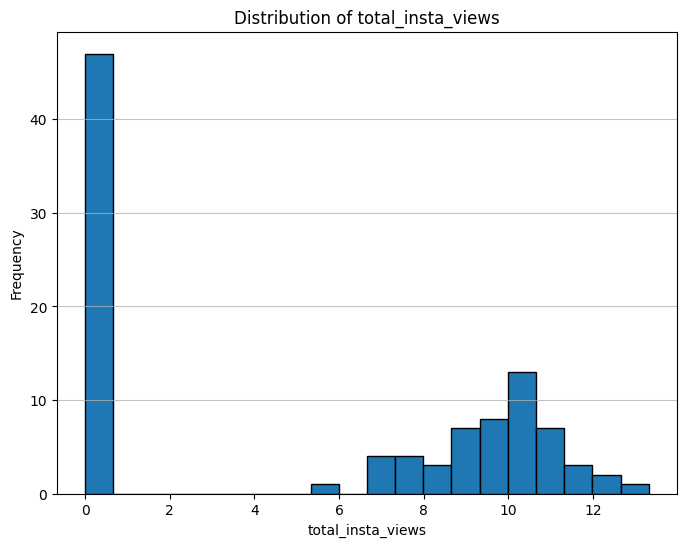

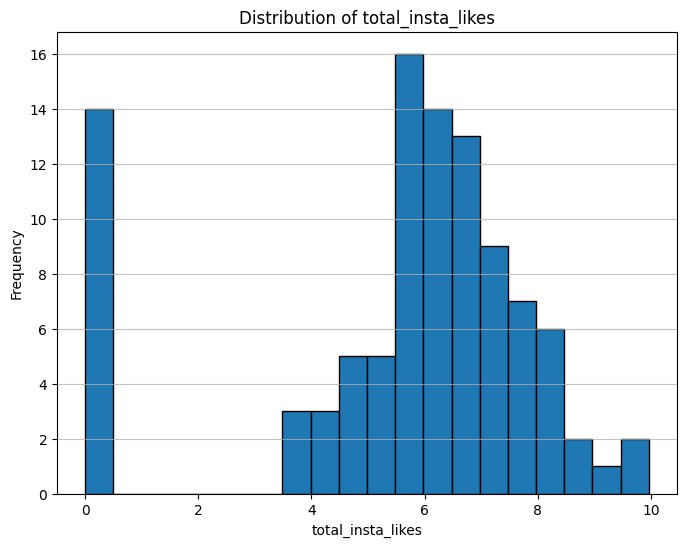

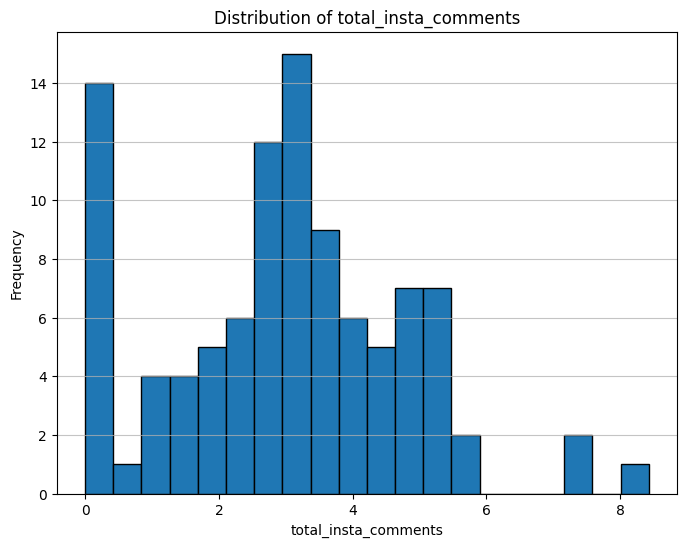

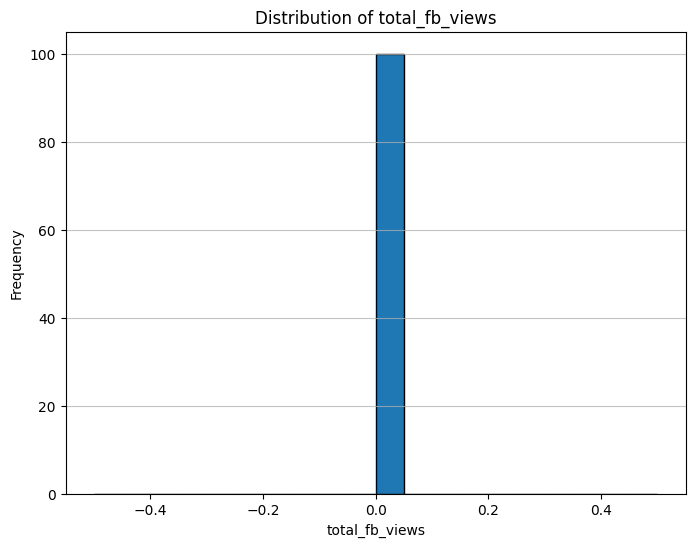

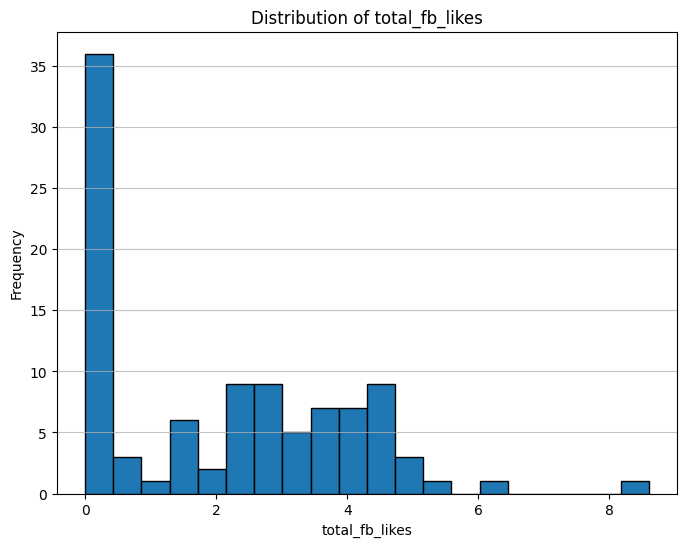

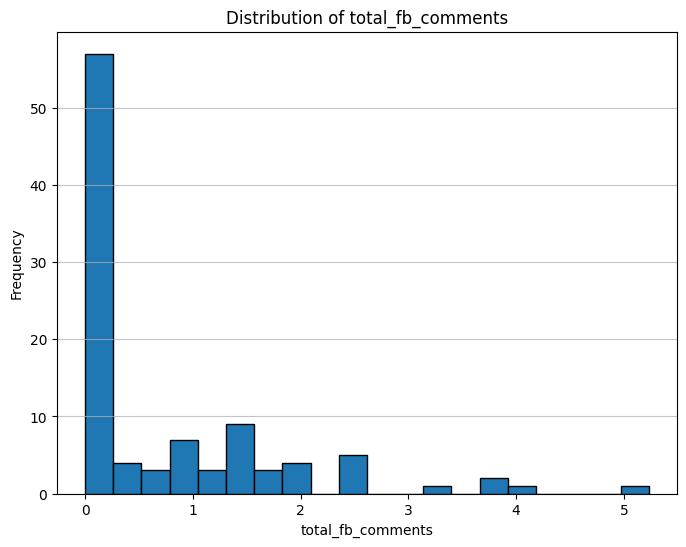

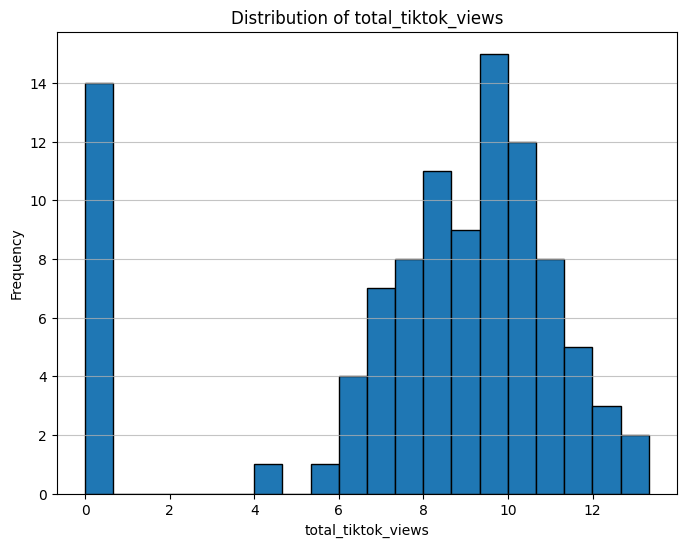

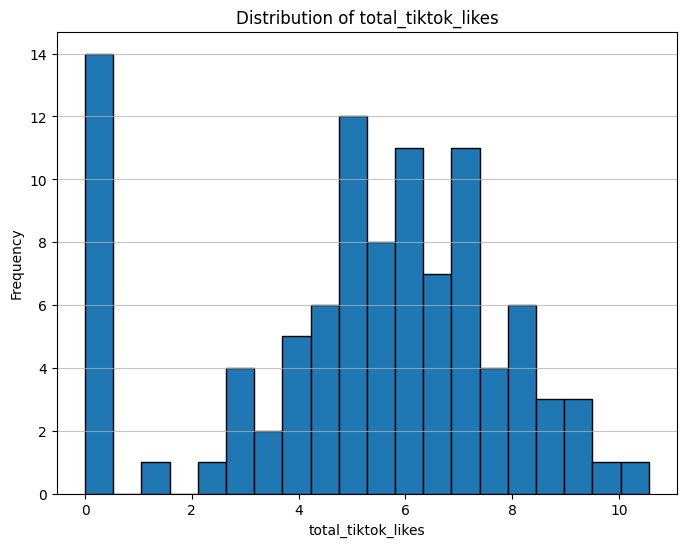

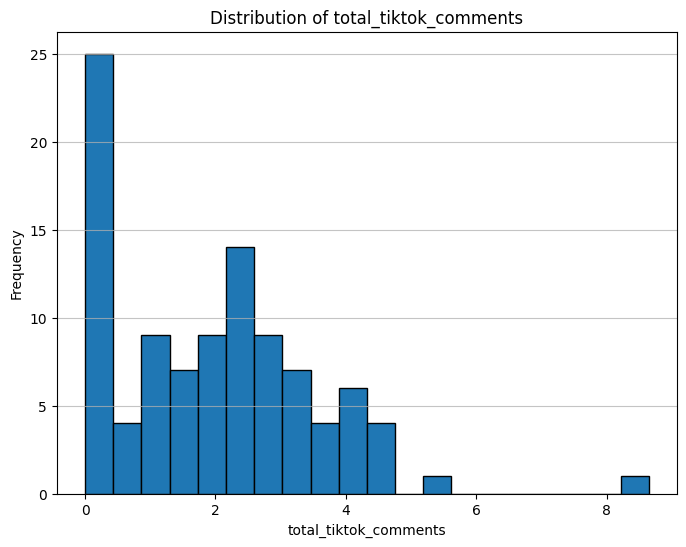

In [15]:
for column in total_engagement:
    plt.figure(figsize=(8, 6))
    plt.hist(np.log(smb[column]+1), bins=20, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()